In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import pandas as pd
from pprint import pprint

In [3]:
disaster_data = "Resources/All USA Disasters.csv"
disaster_df = pd.read_csv(disaster_data)

#load resource file
natural_disaster_file = "Resources/State Time Series 1980-2020.csv"

#Read file and store it in a data frame
disaster_data_df = pd.read_csv(natural_disaster_file)

In [4]:
#create df of disaster costs
total_disaster_cost = disaster_df[["Year","Drought Cost","Flooding Cost","Freeze Cost","Severe Storm Cost","Tropical Cyclone Cost","Wildfire Cost","Winter Storm Cost","All Disasters Cost"]]
total_disaster_cost

,Year,Drought Cost,Flooding Cost,Freeze Cost,Severe Storm Cost,Tropical Cyclone Cost,Wildfire Cost,Winter Storm Cost,All Disasters Cost
0,1980,33.5,2.4,0.0,0.0,2.0,0.0,0.0,37.9
1,1981,0.0,0.0,1.7,1.2,0.0,0.0,0.0,2.9
2,1982,0.0,0.0,0.0,2.6,0.0,0.0,1.8,4.4
3,1983,7.9,8.3,5.3,0.0,8.0,0.0,0.0,29.5
4,1984,0.0,0.0,0.0,2.6,0.0,0.0,0.0,2.6
5,1985,0.0,3.3,3.0,0.0,9.0,0.0,2.1,17.4
6,1986,4.3,0.0,0.0,1.3,0.0,0.0,0.0,5.6
7,1987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1988,45.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
9,1989,6.5,0.0,4.3,1.2,19.3,0.0,1.5,32.8


In [5]:
#crate df of disaster count
disaster_count_df = disaster_data_df[["Year","State","Drought Count","Flooding Count", "Freeze Count",
                                    "Severe Storm Count", "Tropical Cyclone Count", "Wildfire Count",
                                    "Winter Storm Count", "All Disasters Count"]]
disaster_count_df

,Year,State,Drought Count,Flooding Count,Freeze Count,Severe Storm Count,Tropical Cyclone Count,Wildfire Count,Winter Storm Count,All Disasters Count
0,1980,AL,1,0,0,0,0,0,0,1
1,1981,AL,0,0,0,1,0,0,0,1
2,1982,AL,0,0,0,1,0,0,1,2
3,1983,AL,1,1,1,0,0,0,0,3
4,1984,AL,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2004,2016,WY,0,0,0,1,0,1,0,2
2005,2017,WY,0,0,0,1,0,1,0,2
2006,2018,WY,0,0,0,1,0,1,0,2
2007,2019,WY,0,0,0,1,0,0,0,1


In [6]:
disaster_group = disaster_count_df.groupby("Year")

#get the sum of all disasters by year
disasters_total = disaster_group["All Disasters Count"].sum()

#get the sum of each disaster by year
droughts_total = disaster_group["Drought Count"].sum()
floods_total = disaster_group["Flooding Count"].sum()
freeze_total = disaster_group["Freeze Count"].sum()
severestorm_total = disaster_group["Severe Storm Count"].sum()
cyclone_total = disaster_group["Tropical Cyclone Count"].sum()
wildfire_total = disaster_group["Wildfire Count"].sum()
winter_storm_total = disaster_group["Winter Storm Count"].sum()

#create a df of disasters by year
yearly_disaster_df = pd.DataFrame({"Total Disasters":disasters_total,
                                  "Droughts":droughts_total,
                                  "Floods":floods_total,
                                  "Freezes":freeze_total,
                                  "Severe Storms":severestorm_total,
                                  "Cyclones":cyclone_total,
                                  "Wildfires":wildfire_total,
                                  "Winter Storms":winter_storm_total})
yearly_disaster_df

,Total Disasters,Droughts,Floods,Freezes,Severe Storms,Cyclones,Wildfires,Winter Storms
Year,,,,,,,,
1980,25,20,3,0,0,2,0,0
1981,6,0,0,1,5,0,0,0
1982,66,0,0,0,32,0,0,34
1983,64,11,12,40,0,1,0,0
1984,17,0,0,0,17,0,0,0
1985,54,0,4,1,0,21,0,28
1986,14,9,0,0,5,0,0,0
1987,0,0,0,0,0,0,0,0
1988,24,24,0,0,0,0,0,0


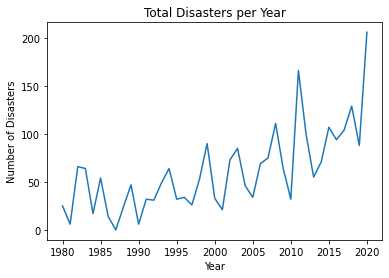

In [7]:
#create line plot x-axis year, y-axis number of disasters
x_axis_data = disaster_data_df["Year"].unique()
disaster_data = yearly_disaster_df["Total Disasters"]
plt.plot(x_axis_data, disaster_data)

#give graph axis titles
plt.title("Total Disasters per Year")
plt.xlabel("Year")
plt.ylabel("Number of Disasters")

plt.show()

In [8]:
state_group = disaster_count_df.groupby("State")

#get the sum of all disasters by state
state_disasters = state_group["All Disasters Count"].sum()

#get the sum of each disaster by state
state_droughts = state_group["Drought Count"].sum()
state_floods = state_group["Flooding Count"].sum()
state_freeze = state_group["Freeze Count"].sum()
state_severestorm = state_group["Severe Storm Count"].sum()
state_cyclone = state_group["Tropical Cyclone Count"].sum()
state_wildfire = state_group["Wildfire Count"].sum()
state_winter_storm = state_group["Winter Storm Count"].sum()

#create a df of disasters by year
state_disaster_df = pd.DataFrame({"Total Disasters":state_disasters,
                                  "Droughts":state_droughts,
                                  "Floods":state_floods,
                                  "Freezes":state_freeze,
                                  "Severe Storms":state_severestorm,
                                  "Cyclones":state_cyclone,
                                  "Wildfires":state_wildfire,
                                  "Winter Storms":state_winter_storm})
state_disaster_df

,Total Disasters,Droughts,Floods,Freezes,Severe Storms,Cyclones,Wildfires,Winter Storms
State,,,,,,,,
AK,7,0,0,0,0,0,7,0
AL,91,15,2,3,40,21,2,8
AR,74,14,9,2,39,4,0,6
AZ,26,12,1,0,1,0,12,0
CA,39,12,4,3,4,0,16,0
CO,52,13,2,1,26,0,10,0
CT,34,1,1,1,10,7,0,14
DE,29,5,1,1,5,7,0,10
FL,65,7,2,5,17,25,4,5


In [9]:
url = "https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries?$filter=declarationDate gt '1980-01-01T04:00:00.000z'"
disaster_request = requests.get(url).json()
#disasters = disaster_request[2]
#pprint(disaster_request)

In [10]:
number_disasters = len(disaster_request['DisasterDeclarationsSummaries'])
print(f"There are {number_disasters} disasters.")

There are 1000 disasters.


In [11]:
summaries = disaster_request["DisasterDeclarationsSummaries"]

dates = []
types = []
state = []



for summary in summaries:
    #print(summary['declarationDate'])
    dates.append(summary['fyDeclared'])
    types.append(summary['declarationTitle'])
    state.append(summary['state'])
disasters_df = pd.DataFrame({"Dates": dates,
                            "Types": types,
                             "State": state
                            })

disasters_df.head()
#print(disaster_request["DisasterDeclarationsSummaries"][0]['declarationDate'])

,Dates,Types,State
0,1980,"TORRENTIAL RAIN, HIGH TIDE & WINDS",CA
1,1980,"TORRENTIAL RAIN, HIGH TIDE & WINDS",CA
2,1980,"TORRENTIAL RAIN, HIGH TIDE & WINDS",CA
3,1980,"SEVERE STORMS, HIGH SURF & FLOODING",HI
4,1980,SEVERE STORMS & FLOODING,AZ


In [12]:
count_gb = disasters_df.groupby("Dates")
total_by_year = count_gb["Types"].count()
total_by_year

Dates
1980    175
1981     66
1982     97
1983    242
1984    297
1985    123
Name: Types, dtype: int64